In [1]:
import os, shutil, copy, ntpath
from keras import models
from keras import layers


/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#directory definitions
# this code has changed since last tested/used

#original_dataset_dir = r'C:\Users\aln15\Documents\SMUHomeWork\Capstone\asl_alphabet_train\asl_alphabet_train'
base_dir =  '../data/original/asl_alphabet'
#base_dir = 'C:/Users/aln15/Documents/SMUHomeWork/Capstone/handsigns'

#os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train_asl')

#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,'validation_asl')
#os.mkdir(validation_dir)


test_dir = os.path.join(base_dir,'test_asl')
#os.mkdir(test_dir)


In [3]:
#data generation setip
import keras
from keras.preprocessing.image import ImageDataGenerator
#image size (original = 28)
tarsize = 150
batchsize = 20

#augnmentation
train_datagen = ImageDataGenerator(
           rotation_range = 0,
           width_shift_range = .2,
           height_shift_range = .2,
           shear_range = .2,
           zoom_range = .2,
           horizontal_flip = False,
           fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
#---------end augmentation 

In [4]:
# dataset definition without augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)
# end without augmentation

In [5]:
#create generators
train_generator = train_datagen.flow_from_directory(
           base_dir,
           target_size = (tarsize, tarsize),
           batch_size=batchsize,
           class_mode = 'categorical',
           subset='training'
)

#create generators
validation_generator = train_datagen.flow_from_directory(
           base_dir,
           target_size = (tarsize, tarsize),
           batch_size=batchsize,
           class_mode = 'categorical',
           subset='validation'
)


Found 78289 images belonging to 29 classes.
Found 8698 images belonging to 29 classes.


In [6]:
#modelling...setup, definition, compile, run and test

callbacks_list = [
 #        tensorboard,
         keras.callbacks.EarlyStopping(monitor='acc', patience=2),
         keras.callbacks.ModelCheckpoint(filepath = '../data/models/handsigns/handsigns.h5', monitor = 'val_loss', save_best_only = True),
         keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience=10)
]


model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(tarsize, tarsize, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

#Add a classfier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dropout(.5))
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.BatchNormalization())
model.add(layers.Dense(29, activation='softmax'))

#compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       73856     
__________

In [7]:
history= model.fit_generator (
           train_generator,
           epochs = 1,
           #callbacks = callbacks_list,
           validation_data=validation_generator,
           verbose=1)


#save the model
model.save('../data/models/handsigns/handsigns_try2aug.h5')



Epoch 1/1
3915/3915 [==============================] - 1433s 366ms/step - loss: 0.6922 - acc: 0.7874 - val_loss: 0.5476 - val_acc: 0.8450


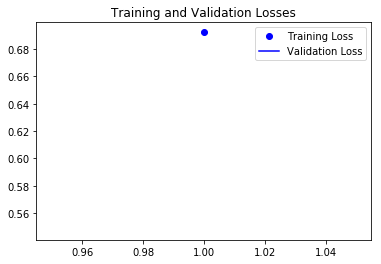

In [10]:
#visualization of model performance
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values =  history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs,val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel='Epochs'
plt.ylabel='Loss'
plt.legend()
plt.show()

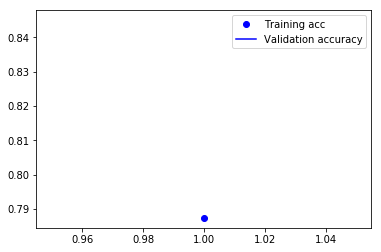

In [9]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs,val_acc_values, 'b', label='Validation accuracy')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.legend()

plt.show()